# Example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statannot import add_stat_annotation
from scipy.stats import levene
from matplotlib.patches import Rectangle

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thur v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.305e+02
Thur v.s. Sat: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.407e-01 U_stat=2.180e+03
Sun v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.041e-02 U_stat=9.605e+02


(<AxesSubplot:xlabel='day', ylabel='total_bill'>,
  <statannot.StatResult.StatResult at 0x7f6e9a138ac0>])

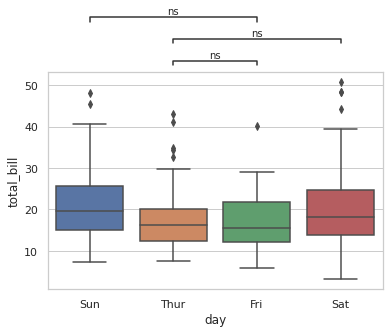

In [3]:
sns.set(style="whitegrid")
df = sns.load_dataset("tips")

x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Stage

In [6]:
df = pd.read_csv('/home/fer/Documents/cfDNA/Clinical/Concentracion_cfDNA.csv')
df.head()

,ID,Stage,Concentration
0,UEB-0205,I,0.81
1,UEB-0208,I,0.88
2,UEB-0209,II,0.36
3,UEB-0210,II,1.27
4,UEB-0211,III,1.07


In [7]:
df.groupby(['Stage']).mean()

,Concentration
Stage,
I,0.7300
II,0.8375
III,1.1160


In [8]:
df['Concentration'].std()

0.7030027856748982

In [9]:
df1 = df[df['Stage']=='I'] 
df2 = df[df['Stage']=='II']
df3 = df[df['Stage']=='III']

stage1 = list(df1.Concentration)
stage2 = list(df2.Concentration)
stage3 = list(df3.Concentration)
stage2

[0.3599999999999999,
 1.27,
 0.32,
 1.32,
 1.27,
 0.4299999999999999,
 0.7099999999999999,
 1.02]

In [10]:
levene(stage1, stage2, stage3)

LeveneResult(statistic=0.8433511755213283, pvalue=0.45250552218134665)

In [11]:
kw, pv = stats.kruskal(stage1, stage2, stage3)
pv

0.9774308925541781

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

I v.s. II: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.100e+01
II v.s. III: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.100e+01
I v.s. III: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=8.000e+00


(<AxesSubplot:xlabel='Stage', ylabel='Concentration'>,
  <statannot.StatResult.StatResult at 0x7f75a2de71f0>])

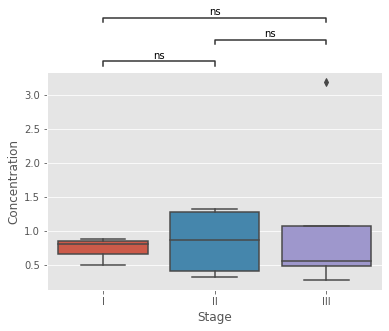

In [6]:
plt.style.use('ggplot')
ax = sns.boxplot(data=df, x='Stage', y='Concentration')
add_stat_annotation(ax, data=df, x='Stage', y='Concentration', 
                    box_pairs=[("I", "II"), ("I", "III"), ("II", "III")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

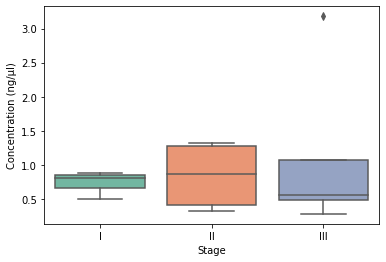

In [7]:
#plt.style.use('ggplot')
#sns.set(style="whitegrid")
#sns.set_theme(color_codes=True)
#fig, ax = plt.subplots(figsize=(5, 5))

from matplotlib.patches import FancyBboxPatch
p = sns.boxplot(data=df, x='Stage', y='Concentration', palette = "Set2")
p.set(xlabel = "Stage", ylabel = "Concentration (ng/μl)")
#p.add_patch(Rectangle((-0.4, 2.7), 1, 0.5, fc="black", zorder=10, alpha = .2))
#plt.text(-0.3, 3, "kw = " + str(round(kw, 4)) , horizontalalignment='left', size=10)
#plt.text(-0.3, 2.85, "p_value = "+ str(round(pv, 4)) , horizontalalignment='left', size=10)
plt.savefig('/home/fer/BoxPlotStage.pdf', dpi=300)

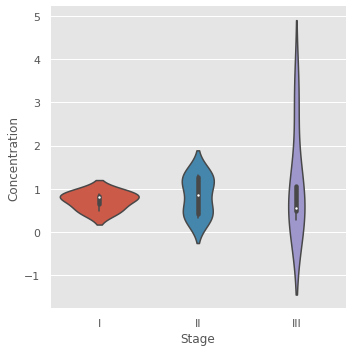

In [17]:
sns.catplot(data=df, kind="violin",x='Stage', y='Concentration')
plt.show()

# Histologica

In [79]:
df = pd.read_csv('/home/fer/Documents/cfDNA/Clinical/VariantCounts.csv')
df = df.replace({'Sarcomatoid metaplastic':'SM'})
df.head()

,Unnamed: 0,ID,Age,Stadium,Sex,ResponseQX,Histological,Tumor_progression,T,N,TumorFraction,SubMolec,cfDNA_concentration,CNV_all,CNV_cfDNA,CNV_tumor,SNV_all,CNV_cfDNASNV,All
0,0,UEB_0205,76.0,IA,Female,Partial,IDC,Remission,1.0,0.0,0.00000,NaN,0.81,7.0,0.0,7.0,1.0,1.0,8.0
1,1,UEB_0208,55.0,IA,Female,Complete,IDC,Remission,1.0,0.0,0.01832,NaN,0.88,8.0,4.0,4.0,1.0,5.0,9.0
2,2,UEB_0209,51.0,IIA,Female,NaN,IDC,Remission,2.0,0.0,0.01756,NaN,0.36,32.0,15.0,17.0,0.0,15.0,32.0
3,3,UEB_0210,55.0,IIA,Female,Partial,IDC,NaN,2.0,0.0,0.01458,Luminal B Like HER2+,1.27,28.0,21.0,7.0,0.0,21.0,28.0
4,4,UEB_0211,68.0,IIIC,Male,Partial,IDC,Active disease,4.0,1.0,0.02001,NaN,1.07,24.0,11.0,13.0,0.0,11.0,24.0


In [80]:
df['Histological'].value_counts()


IDC            18
Phyllodes       4
SM              1
Metaplastic     1
Mucinous        1
Lobular         1
Name: Histological, dtype: int64

In [81]:
df1 = df[df['Histological']=='IDC'] 
df2 = df[df['Histological']=='Phyllodes']
df3 = df[df['Histological']=='SM']
df4 = df[df['Histological']=='Metaplastic']
df5 = df[df['Histological']=='Lobular']

stage1 = list(df1.cfDNA_concentration)
stage1 = [x for x in stage1 if str(x) != 'nan']
stage2 = list(df2.cfDNA_concentration)
stage2 = [x for x in stage2 if str(x) != 'nan']
stage3 = list(df3.cfDNA_concentration)
stage3 = [x for x in stage3 if str(x) != 'nan']
stage4 = list(df4.cfDNA_concentration)
stage4 = [x for x in stage4 if str(x) != 'nan']
stage5 = list(df5.cfDNA_concentration)
stage5 = [x for x in stage5 if str(x) != 'nan']

In [82]:
levene(stage1, stage2, stage3, stage4, stage5)

LeveneResult(statistic=1.4114005389345683, pvalue=0.2991229284136108)

In [83]:
kw, pv = stats.kruskal(stage1, stage2, stage3, stage4, stage5)

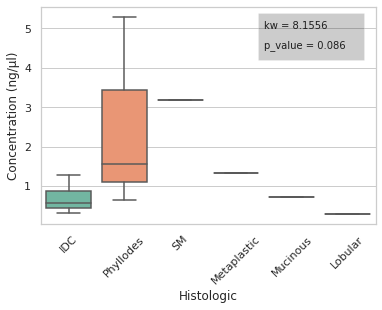

In [84]:
sns.set(style="whitegrid")
#sns.set_theme(color_codes=True)
#fig, ax = plt.subplots(figsize=(5, 5))

from matplotlib.patches import FancyBboxPatch
p = sns.boxplot(data=df, x='Histological', y='cfDNA_concentration', palette = "Set2")
p.set_xticklabels(p.get_xticklabels(),rotation = 45)

p.set(xlabel = "Histologic", ylabel = "Concentration (ng/μl)")

p.add_patch(Rectangle((3.4, 4.2), 1.9, 1.2, fc="black", zorder=10, alpha = .2))
plt.text(3.5, 5, "kw = " + str(round(kw, 4)) , horizontalalignment='left', size=10)
plt.text(3.5, 4.5, "p_value = "+ str(round(pv, 4)) , horizontalalignment='left', size=10)
plt.savefig('/home/fer/BoxPlotStage.pdf', dpi=300)

In [73]:
stage3

[3.18]

# SubMolec

In [63]:
df['SubMolec'].value_counts()

Luminal B Like HER2+    4
Triple Negativo         3
Luminal A               2
Luminal B               1
Name: SubMolec, dtype: int64

In [74]:
df1 = df[df['SubMolec']=='Luminal B Like HER2+'] 
df2 = df[df['SubMolec']=='Triple Negativo'] 
df3 = df[df['SubMolec']=='Luminal A'] 
df4 = df[df['SubMolec']=='Luminal B'] 

stage1 = list(df1.cfDNA_concentration)
stage1 = [x for x in stage1 if str(x) != 'nan']
stage2 = list(df2.cfDNA_concentration)
stage2 = [x for x in stage2 if str(x) != 'nan']
stage3 = list(df2.cfDNA_concentration)
stage3 = [x for x in stage3 if str(x) != 'nan']
stage4 = list(df2.cfDNA_concentration)
stage4 = [x for x in stage4 if str(x) != 'nan']

In [75]:
levene(stage1, stage2, stage3, stage4)

LeveneResult(statistic=1.0024146323541903e+31, pvalue=5.349063567623473e-47)

In [76]:
kw, pv = stats.kruskal(stage1, stage2, stage3, stage4, stage5)

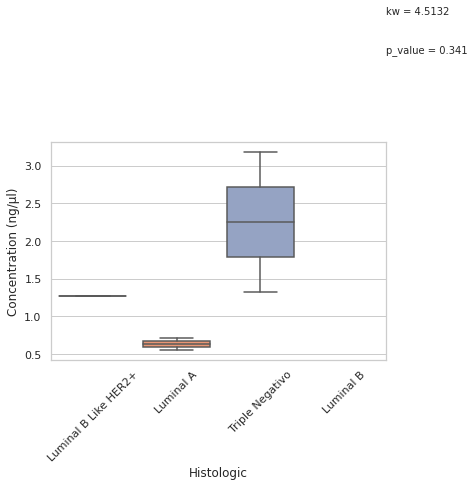

In [78]:
sns.set(style="whitegrid")
#sns.set_theme(color_codes=True)
#fig, ax = plt.subplots(figsize=(5, 5))

from matplotlib.patches import FancyBboxPatch
p = sns.boxplot(data=df, x='SubMolec', y='cfDNA_concentration', palette = "Set2")
p.set_xticklabels(p.get_xticklabels(),rotation = 45)

p.set(xlabel = "Histologic", ylabel = "Concentration (ng/μl)")

p.add_patch(Rectangle((3.4, 4.2), 1.9, 1.2, fc="black", zorder=10, alpha = .2))
plt.text(3.5, 5, "kw = " + str(round(kw, 4)) , horizontalalignment='left', size=10)
plt.text(3.5, 4.5, "p_value = "+ str(round(pv, 4)) , horizontalalignment='left', size=10)
plt.savefig('/home/fer/BoxPlotStage.pdf', dpi=300)

# Treatment

In [6]:
df = pd.read_csv('/home/fer/Documents/cfDNA/Clinical/Treatment.csv')
#df = df.replace({'Surgery':'Srg'})
#df = df.replace({'Chemotherapy':'Chem'})
#df = df.replace({'Radiotherapy':'Rad'})
#df = df.replace({'Rad and Chem':'Rad-Chem'})
df.head()

,ID,Concentration,Treatment,TreatmentV2,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,UEB-0228,0.48,Surgery,SX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UEB-0205,0.81,Rad and Chem,RTX-AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UEB-0208,0.88,Chemotherapy,NAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UEB-0209,0.36,Surgery,SX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UEB-0210,1.27,Rad and Chem,RTX-NAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



ValueError: box_pairs contains an invalid box pair.

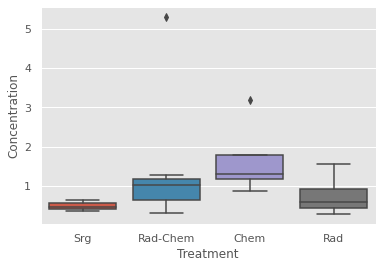

In [22]:
plt.style.use('ggplot')
ax = sns.boxplot(data=df, x='Treatment', y='Concentration')
add_stat_annotation(ax, data=df, x='Treatment', y='Concentration', 
                    box_pairs=[("Surgery", "Chemotherapy"), ("Surgery", "Rad and Chem"), 
                               ("Chemotherapy", "Rad and Chem"), ("Radiotherapy", "Rad and Chem"),
                              ("Surgery", "Radiotherapy"),("Chemotherapy", "Radiotherapy")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

#add_stat_annotation(ax, data=df, x='Treatment', y='Concentration', 
#                    box_pairs=[("Surgery", "Chemotherapy"),("Chemotherapy", "Radiotherapy")],
#                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [7]:
for i in df['TreatmentV2'].unique():
    print(i)

SX
RTX-AC
NAC
RTX-NAC
RTX
AC


In [8]:
df_Surg = df[df['Treatment']=='Srg']
df_Rad_Chem = df[df['Treatment']=='Rad-Chem']
df_chem = df[df['Treatment']=='Chem']
df_rad = df[df['Treatment']=='Rad']


Surg = list(df_Surg.Concentration)
Rad_Chem = list(df_Rad_Chem.Concentration)
Chem = list(df_chem.Concentration)
Rad = list(df_rad.Concentration)

In [16]:
df_Sx = df[df['TreatmentV2']=='SX']
df_RTXAC = df[df['TreatmentV2']=='RTX-AC']
df_NCT = df[df['TreatmentV2']=='NAC']
df_RTXNCT = df[df['TreatmentV2']=='RTX-NAC']
df_RTX = df[df['TreatmentV2']=='RTX']
df_AC = df[df['TreatmentV2']=='AC']

df_Sx = list(df_Sx.Concentration)
df_RTXAC = list(df_RTXAC .Concentration)
df_NCT = list(df_NCT.Concentration)
df_RTXNCT = list(df_RTXNCT.Concentration)
df_RTX  = list(df_RTX.Concentration)
df_AC = list(df_AC .Concentration)

In [17]:
df_Sx

[0.48, 0.36, 0.56, 0.43, 0.64]

In [12]:
levene(Surg, Rad_Chem, Chem, Rad)

LeveneResult(statistic=nan, pvalue=nan)

In [18]:
levene(df_Sx, df_RTXAC, df_NCT, df_RTXNCT, df_RTX, df_AC)

LeveneResult(statistic=3.471840504893044, pvalue=0.03268623575020781)

In [19]:
kw, pv = stats.kruskal(Surg, Rad_Chem, Chem, Rad)

In [21]:
kw, pv = stats.kruskal(df_Sx, df_RTXAC, df_NCT, df_RTXNCT, df_RTX, df_AC)
pv

0.15878445156662058

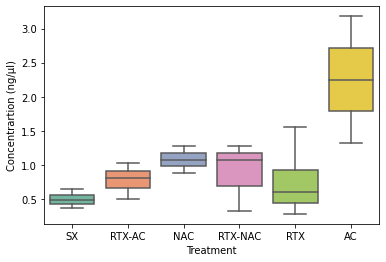

In [22]:
#plt.style.use('ggplot')
#fig, ax = plt.subplots(figsize=(5, 5))
#sns.set(style="whitegrid")

p = sns.boxplot(data=df, x='TreatmentV2', y='Concentration', palette = "Set2")
p.set(xlabel = "Treatment", ylabel = "Concentrartion (ng/μl)")

#p.add_patch(Rectangle((2.21, 4.42), 1.2, 0.9, fc="black", zorder=10, alpha = .2))

#plt.text(2.3, 5, "kw = " + str(round(kw, 4)) , horizontalalignment='left', size=10)
#plt.text(2.3, 4.7, "p_value = "+ str(round(pv, 4)) , horizontalalignment='left', size=10)
plt.savefig('/home/fer/BoxPlotTreatment.pdf', dpi=10000)

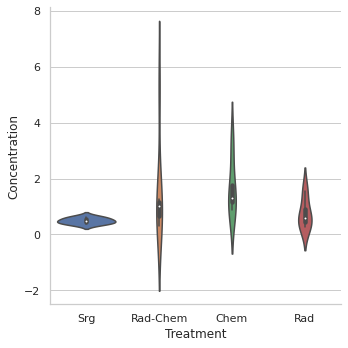

In [20]:
sns.catplot(data=df, kind="violin",x='Treatment', y='Concentration')
plt.show()

# Age

In [21]:
df = pd.read_csv('/home/fer/Documents/cfDNA/Clinical/Age.csv')
df.head()

,ID,Age,Concentration
0,UEB-0228,50-60,0.48
1,UEB-0205,>60,0.81
2,UEB-0208,50-60,0.88
3,UEB-0209,50-60,0.36
4,UEB-0210,50-60,1.27


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

>60 v.s. <50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.300e+01
50-60 v.s. >60: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.150e+01
50-60 v.s. <50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.300e+01


(<AxesSubplot:xlabel='Age', ylabel='Concentration'>,
  <statannot.StatResult.StatResult at 0x7f2f05a1bc70>])

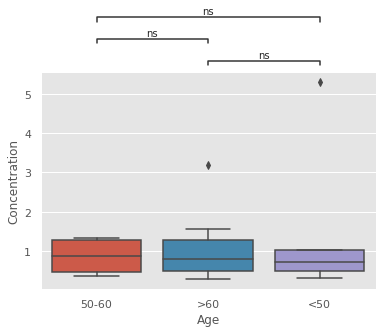

In [43]:
plt.style.use('ggplot')
ax = sns.boxplot(data=df, x='Age', y='Concentration')

add_stat_annotation(ax, data=df, x='Age', y='Concentration', 
                    box_pairs=[("<50", "50-60"),("<50", ">60"),("50-60", ">60")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

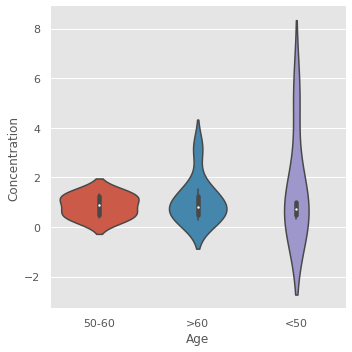

In [44]:
sns.catplot(data=df, kind="violin",x='Age', y='Concentration')
plt.show()

In [24]:
df_menor = df[df['Age']=='<50'] 
df_median = df[df['Age'] == '50-60']
df_mayor = df[df['Age'] == '>60']

menor = list(df_menor.Concentration)
median = list(df_median.Concentration)
mayor = list(df_mayor.Concentration)

In [28]:
levene(menor, median, mayor)

LeveneResult(statistic=0.6162906621392191, pvalue=0.5522772677736059)

In [25]:
stats.kruskal(menor, median, mayor)

KruskalResult(statistic=0.0158033362598818, pvalue=0.992129467986618)

# Tumoral Fraction

In [1]:
import pandas as pd 
df = pd.read_csv('/home/fer/Documents/cfDNA/Clinical/TumoralFraction.csv')
df

,ID,FracTum,Stage
0,UEB-0228,0.01414,Unknow
1,UEB-0205,0.00000,I
2,UEB-0208,0.01832,IA
3,UEB-0209,0.01756,IIA
4,UEB-0210,0.01458,IIA
5,UEB-0211,0.02001,IIIC
6,UEB-0213,0.01495,IIA
7,UEB-0214,0.01339,Unknow
8,UEB-0215,0.01796,IIIC
9,UEB-0216,0.01342,Unknow


In [33]:
df.loc[df.FracTum==0,'FracTumRound']=0

intervalos = [0.001,0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,0.009,0.010, 0.011,  0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.020, 0.021, 0.022] 

for i in intervalos:
    df.loc[df.FracTum > i,'FracTumRound']=i
df

,ID,FracTum,Stage,FracTumRound
0,UEB-0228,0.01414,Unknow,0.014
1,UEB-0205,0.00000,I,0.000
2,UEB-0208,0.01832,IA,0.018
3,UEB-0209,0.01756,IIA,0.017
4,UEB-0210,0.01458,IIA,0.014
5,UEB-0211,0.02001,IIIC,0.020
6,UEB-0213,0.01495,IIA,0.014
7,UEB-0214,0.01339,Unknow,0.013
8,UEB-0215,0.01796,IIIC,0.017
9,UEB-0216,0.01342,Unknow,0.013


In [7]:
stages = set(list(df.Stage))
stages = list(stages)
stages

['IIA', 'IA', 'IIB', 'Unknow', 'IIIC', 'IIIB', 'I']

In [39]:
#Filtrado por estadios
desconocido = df[df['Stage']=='Unknow']
dfIIA = df[df['Stage'] == 'IIA']
dfIA = df[df['Stage'] == 'IA']
dfIIB = df[df['Stage'] == 'IIB']
dfIIIC = df[df['Stage'] == 'IIIC']
dfIIIB = df[df['Stage'] == 'IIIB']
dfI = df[df['Stage'] == 'I']

In [55]:
a = list(desconocido.FracTumRound)
b = list(dfIIA.FracTumRound)
c = list(dfIA.FracTumRound)
d = list(dfIIB.FracTumRound)
e = list(dfIIIC.FracTumRound)
f = list(dfIIIB.FracTumRound)
g = list(dfI.FracTumRound)

lenmax = max(len(a),len(b),len(c),len(d),len(e),len(f),len(g))

lst = [a,b,c,d,e,f,g]

for i in lst:
    if len(i) == lenmax:
        print('La lista maxima es: ' + str(i))
    else:
        delta = lenmax - len(i)
        print('agregando' + str(delta))
        while len(i) < lenmax:
            i.append(0)
            

La lista maxima es: [0.014, 0.013, 0.013, 0.013, 0.014]
La lista maxima es: [0.017, 0.014, 0.014, 0.0, 0.02]
agregando4
agregando2
agregando3
agregando2
agregando4


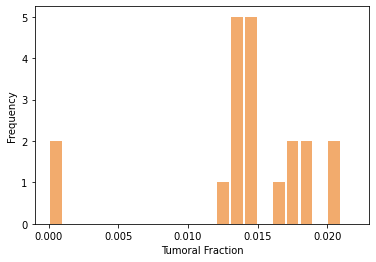

In [27]:
import matplotlib.pyplot as plt
import seaborn as sb

ft = np.array(df['FracTum'])


ejes = [0, 0.005, 0.010, 0.015, 0.020]


plt.hist(x=ft, bins=intervalos, color='#F2AB6D', rwidth=0.85,stacked=True)
plt.xlabel('Tumoral Fraction')
plt.ylabel('Frequency')
plt.xticks(ejes)

plt.savefig('/home/fer/HistoTumoralFraction.png', dpi=300)

In [81]:
s = pd.DataFrame(df[['Stage', 'FracTumRound']].value_counts())
s.columns = ['Freq']
s.to_csv('/home/fer/Global.csv')

In [82]:
df = pd.read_csv('/home/fer/Global.csv')
df

,Stage,FracTumRound,Freq
0,Unknow,0.013,3
1,IIA,0.014,2
2,Unknow,0.014,2
3,I,0.000,1
4,IA,0.018,1
5,IIA,0.000,1
6,IIA,0.017,1
7,IIA,0.020,1
8,IIB,0.013,1
9,IIB,0.014,1


El resto esta en otro script en R